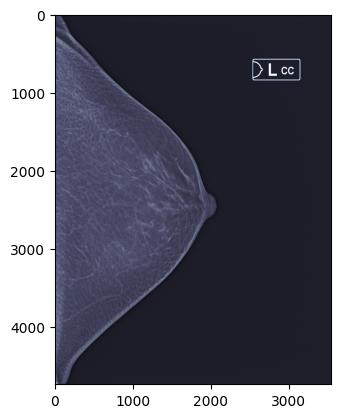

In [1]:
from utils.image import plot_dicom_from_path
plot_dicom_from_path('Raw Data/benign/N220/P182-L-CC.dcm')


In [2]:
import pandas as pd
pd.read_csv('Raw Data/mammogram.csv')


,order,FinalSubjectId,subjectId,cancerL,cancerR,densityL,densityR,benignMass,malignantMass,benignCalc,...,malignantARD,invL,invR,age,assessL,assessR,tumorSize (mm),DiagReport,PathReport,annotationCount
0,1,N1,P110,0,0,1,1,L,0,R,...,0,0.0,0.0,52,2,2,NaN,NaN,NaN,4
1,2,N2,P260,0,0,4,4,0,0,"L,R",...,0,0.0,0.0,37,2,2,NaN,NaN,NaN,4
2,3,N3,P084,0,0,3,3,0,0,"L,R",...,0,0.0,0.0,66,2,2,NaN,NaN,NaN,4
3,4,N4,P081,0,0,3,3,R,0,L,...,0,0.0,0.0,55,2,2,NaN,NaN,NaN,4
4,5,N5,P143,0,0,1,1,0,0,"L,R",...,0,0.0,0.0,63,2,2,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,C246,P396,0,1,3,3,0,R,L,...,0,NaN,1.0,68,2,5,10,NaN,IDC_with_rare_DCIS,3
496,497,C247,P378,0,1,3,3,L,R,"L,R",...,0,NaN,0.0,60,2,4,14.4,NaN,DCIS_on_intraductal_papilloma,4
497,498,C248,P424,0,1,4,4,0,R,R,...,0,NaN,1.0,40,2,4,15.3,NaN,IDC,3
498,499,C249,P416,0,1,3,3,0,R,"L,R",...,0,NaN,1.0,77,2,5,9.3,NaN,IDC+DCIS_with_direct_epidermal_invasion,4


In [27]:
from torch.utils.data.dataset import random_split
from data.dataset import DCMDataset
from data.loader import dataset_collate


dataset = DCMDataset('Raw Data', 'Raw Data/mammogram.csv', dataset_collate)
train_dataset, test_dataset = random_split(dataset,[int(len(dataset)*0.8),len(dataset)-int(len(dataset)*0.8)])

In [28]:
from torch.utils.data import DataLoader
dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [29]:
next(iter(dataloader))

/home/patrick/Workspace/Research/Cancer classification/venv/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[tensor([[[[[-1.0000e+00, -1.0000e+00, -1.0000e+00,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            [-1.0000e+00, -1.0000e+00, -1.0000e+00,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            [-1.0000e+00, -1.0000e+00, -1.0000e+00,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            ...,
            [ 2.9750e+03,  2.4645e+03,  2.6980e+03,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            [ 2.0095e+03,  1.9640e+03,  2.1925e+03,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            [ 2.4260e+03,  2.7430e+03,  2.9845e+03,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00]]],
 
 
          [[[ 5.6940e+03,  5.2690e+03,  5.2380e+03,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            [ 5.0675e+03,  5.2650e+03,  5.0960e+03,  ..., -1.0000e+00,
             -1.0000e+00, -1.0000e+00],
            [ 5.0805e+03,  5.1245e+03,  4.8170e+03,  ..., -1.0000e+00,
             -1.00

In [3]:
from model.classification import MetaClassifier
model = MetaClassifier()
print(model.params())

+----------------------+------------+
|       Modules        | Parameters |
+----------------------+------------+
| linear1.0.0.0.weight |   12288    |
|  linear1.0.0.0.bias  |     24     |
| linear1.0.0.2.weight |     24     |
|  linear1.0.0.2.bias  |     1      |
+----------------------+------------+
Total Trainable Params: 12337
12337
